In [8]:
import os
import cv2
from time import time
import numpy as np
from sklearn import preprocessing
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [9]:
D = 48*48
categories = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
train_dir = 'FER2013/train'
test_dir = 'FER2013/test'

In [10]:
def build_list(dir, categories):
    im_list = []
    lb_list = []
    for category in categories:
        path = os.path.join(dir, category)

        for img in os.listdir(path):
            img_path = os.path.join(path, img)
            im_list.append(img_path)
            lb_list.append(category)

    return im_list, lb_list

In [11]:
def vectorize_img(imgPath):
    rgb = cv2.imread(imgPath)
    img = cv2.resize(rgb, (48, 48))
    imGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    imVec = imGray.reshape(1, D)
    
    return imVec

In [12]:
def build_data_matrix(h, w, im_list, lb_list):
    X_full = np.zeros((h, w))
    lb = preprocessing.LabelEncoder()
    y = lb.fit_transform(lb_list)
    y_full = y.reshape(-1, 1)

    for i in range(len(im_list)):
        X_full[i, :] = vectorize_img(im_list[i])
        
    return X_full, y_full

In [13]:
im_list, lb_list = build_list(train_dir, categories)

In [14]:
h = len(im_list)
w = D
X, y = build_data_matrix(h, w, im_list, lb_list)

In [15]:
y = y.reshape(-1,1)

In [16]:
t0 = time()
pca = PCA(n_components=150, svd_solver='randomized', whiten=True).fit(X)
print("done in %0.3fs" % (time() - t0))

done in 9.852s


In [17]:
t0 = time()
X_train_pca = pca.transform(X)
print("done in %0.3fs" % (time() - t0))

done in 0.810s


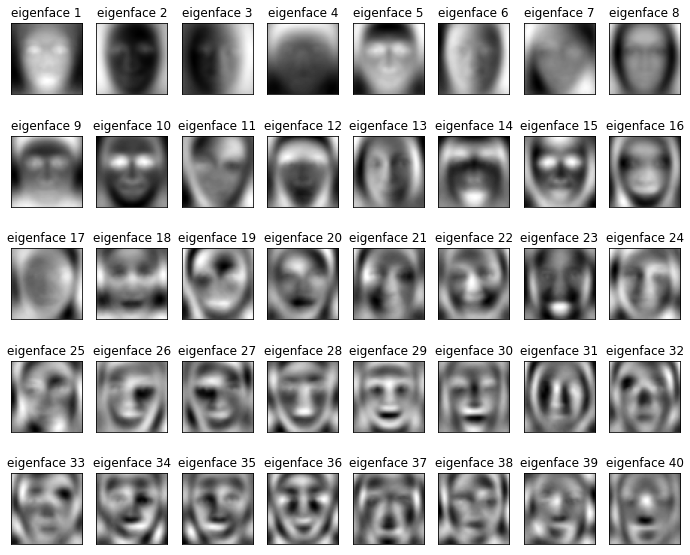

In [18]:
def show_eigenfaces(pca):
    fig, axes = plt.subplots(5, 8, figsize=(12, 10), subplot_kw = {'xticks':[], 'yticks':[]})
    for i, ax in enumerate(axes.flat):
        ax.imshow(pca.components_[i].reshape(48, 48), cmap='gray')
        ax.set_title('eigenface' + " " + str(i+1))
    plt.show()

show_eigenfaces(pca)